<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/Vorselektion_Mark4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

#init Repository - YOLOv5
%cd /content


!git clone https://github.com/thofes/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install


Mounted at /content.gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13881, done.
remote: Total 13881 (delta 0), reused 0 (delta 0), pack-reused 13881
Receiving objects: 100% (13881/13881), 25.95 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (9404/9404), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


In [2]:
import os
PATH = '/content.gdrive/MyDrive/Vorselektion/Ramsau_Samples'
samples = next(os.walk(PATH))[1]
print(samples)



Labels = {}
for i, s in enumerate(samples):
  landing_pic = next(os.walk(PATH + '/' + s))[1]
  Labels.update({str(s): landing_pic})

print(Labels)
td = Labels.keys()
print(list(td))


['88', '39', '41', '42', '40', '90', '91', '94', '92', '43', '44', '64', '65', '62', '46', '63', '45', '85', '84', '86', '31', '30', '33', '32', '73', '74', '75', '76', '1', '2', '3', '29', '4', '89']
{'88': ['3_0132'], '39': ['2_0101'], '41': ['2_0110'], '42': ['3_0125'], '40': ['3_0128'], '90': ['3_0140'], '91': ['3_0144'], '94': ['3_0151'], '92': ['4_0142'], '43': ['3_143'], '44': ['3_0130'], '64': ['3_0120'], '65': ['3_0126'], '62': ['3_0124'], '46': ['2_0118'], '63': ['3_0124'], '45': ['3_0122'], '85': ['3_0143'], '84': ['3_0138'], '86': ['3_0121'], '31': ['2_0107'], '30': ['2_0092'], '33': ['2_0107'], '32': ['3_0117'], '73': ['3_0138'], '74': ['3_0135'], '75': ['2_0105'], '76': ['3_0129'], '1': ['2_0099'], '2': ['2_0112'], '3': ['3_0124'], '29': ['3_0065'], '4': ['2_0099'], '89': ['3_0138']}
['88', '39', '41', '42', '40', '90', '91', '94', '92', '43', '44', '64', '65', '62', '46', '63', '45', '85', '84', '86', '31', '30', '33', '32', '73', '74', '75', '76', '1', '2', '3', '29', '

In [ ]:
#to compare

Labels = { '29':['Cam1_0158'], '30':['Cam1_0157'], '31':['Cam1_0173','Cam4_0173'], '32':['Cam1_0166','Cam4_0166'], '33':['Cam4_0196'], '34':['Cam3_0198','Cam4_0198'], '35':['Cam3_0219'], '36':['Cam3_0215'], '42':['Cam1_0170'], '43':['Cam1_0151','Cam2_0151'], '44':['Cam1_0179','Cam4_178'], '45':['Cam1_0196','Cam4_0196'], '46':['Cam4_0183'], '47':['Cam1_0169','Cam4_0169'], '48':['Cam3_0193','Cam4_0193']}
print(Labels['31'])
print(Labels['42'])
td = Labels.keys()
print(list(td))


['Cam1_0173', 'Cam4_0173']
['Cam1_0170']
['29', '30', '31', '32', '33', '34', '35', '36', '42', '43', '44', '45', '46', '47', '48']


In [ ]:
#manually Detection Yolo

import os

xx = '31'

landing_pic = "/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/" + xx

Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
if os.path.isdir(Path_Result_1):
  print("Path exists")
else:
  os.mkdir(Path_Result_1)
  print("Path was not existing")

Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
if os.path.isdir(Path_Result_2):
  print("Path exists")
else:
  os.mkdir(Path_Result_2)
  print("Path was not existing")


Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
if os.path.isdir(Path_Result_3):
  print("Path exists")
else:
  os.mkdir(Path_Result_3)
  print("Path was not existing")


x = input ("Enter your confidence threshold: ")
if float(x) > 0 and float(x) < 1:
  print("Confidence Threshold is ", x)
else:
  print("Threshold should be between 0 and 1. Your choice was incorrect so now default threshold is 0.6")
  x = 0.6

name = 'confthres' + str(x)

%cd /content/yolov5
#Skijumper only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

#Landing Frame only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

#Landing and Flight
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}


Path exists
Path exists
Path exists
Enter your confidence threshold: 0.84
Confidence Threshold is  0.84
/content/yolov5


Enter which Results you want to see: (1 for landing sequence, 2 for landing/flight, 3 for landing frame) 2
Results of the landing/flight selection


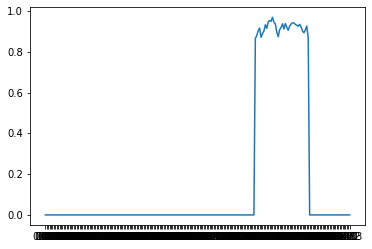

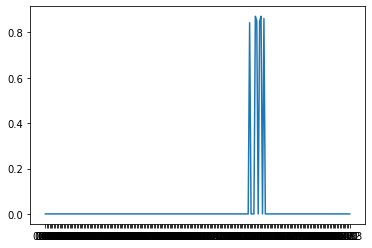

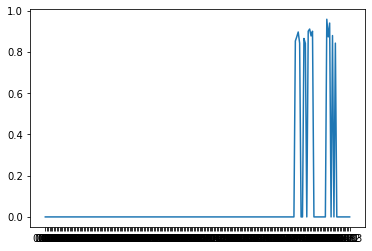

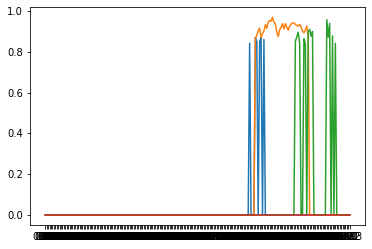

The Preselection would detect landings in following frames:  ['1_0173', '4_0181']
By manually labeling following frame is the landing:  Cam1_0173/Cam4_0173


In [ ]:
#manually selection 

import json
import numpy as np
import matplotlib.pyplot as plt

x = input ("Enter which Results you want to see: (1 for landing sequence, 2 for landing/flight, 3 for landing frame) ")
if x == '1':
  Path = Path_Result_1
  print("Results of the landing sequence selection")
elif x == '2':
  Path = Path_Result_2
  print("Results of the landing/flight selection")
elif x == '3':
  Path = Path_Result_3
  print("Results of the landing frame selection")
else:
  print("Wrong choise - i show the results of the landing/flight selection")
  Path = Path_Result_3

with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])


with open(Path[:-2] + "results.json", "r") as fp:
    resultdata = json.load(fp)


resultdata["Ordner"].append(xx)
resultdata["SOLL"].append(Labels[xx])

X = index
Y = conf

plt.plot(X, Y)
plt.show()

index1 = []
conf1 = []
cls1 = []
index2 = []
conf2 = []
cls2 = []
index3 = []
conf3 = []
cls3 = []
index4 = []
conf4 = []
cls4 = []

for i, x in enumerate(index):
    if x[0] == '1':
      conf2.append(conf[i])
      index2.append(x[2:])
      cls2.append(cls[i])
    elif x[0] == '2':
      conf1.append(conf[i])
      index1.append(x[2:])
      cls1.append(cls[i])
    elif x[0] == '3':
      conf4.append(conf[i])
      index4.append(x[2:])
      cls4.append(cls[i])
    elif x[0] == '4':
      conf3.append(conf[i])
      index3.append(x[2:])
      cls3.append(cls[i])



plt.plot(index2, conf2)
plt.show()
plt.plot(index1, conf1)
plt.show()
plt.plot(index4, conf4)
plt.show()
plt.plot(index3, conf3)
plt.show()

plt.plot(index1, conf1)
plt.plot(index2, conf2)
plt.plot(index3, conf3)
plt.plot(index4, conf4)
plt.show()


if 1 in cls:
 
    detections = []
    lastcls = 9
    for i, c in enumerate(cls1):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("2_" + index1[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls2):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("1_" + index2[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls3):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("4_" + index3[i])
            lastcls = 9

    lastcls = 9
    for i, c in enumerate(cls4):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append("3_" + index4[i])
            lastcls = 9



    print("The Preselection would detect landings in following frames: ", detections)
    resultdata["Selection"].append(detections)

else:
  
    maxindex = np.argmax(conf)
    detection = index[maxindex]  
    print("The Preselection would detect the landing in following frame: ", detection)
    resultdata["Selection"].append(detection)

print("By manually labeling following frame is the landing: ", Labels[xx])




#with open(Path[:-2] + "results.json", "w") as fp:
    #json.dump(resultdata, fp, indent=4)


In [ ]:
#to compare
Labels = { '29':'1_0158', '30':'1_0157', '31':'1_0173/4_0173', '32':'1_0166/4_0166', '33':'4_0196', '34':'3_0198/4_0198', '35':'3_0219', '36':'3_0215', '42':'1_0170', '43':'1_0151/2_0151', '44':'1_0179/4_178', '45':'1_0196/4_0196', '46':'4_0183', '47':'1_0169/4_0169', '48':'3_0193/4_0193'}
print(Labels['29'])
print(Labels['42'])
td = Labels.keys()
print(list(td))


1_0158
1_0170
['29', '30', '31', '32', '33', '34', '35', '36', '42', '43', '44', '45', '46', '47', '48']


Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/29, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/29, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/808 /content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/29/Cam1_0000.jpg: 384x640 (no detections), 12.6ms
image 2/808 

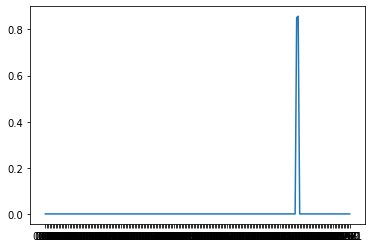

The Preselection would detect the landing in following frame:  1_0146
By manually labeling following frame is the landing:  ['Cam1_0158']
Results of the landing/flight selection


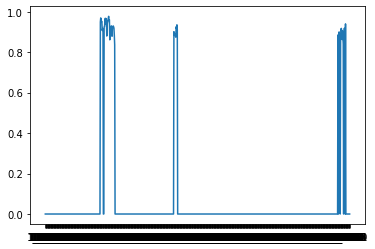

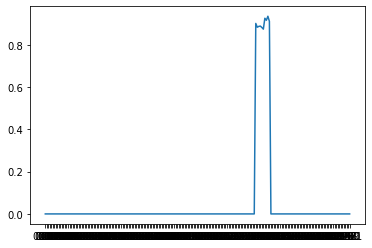

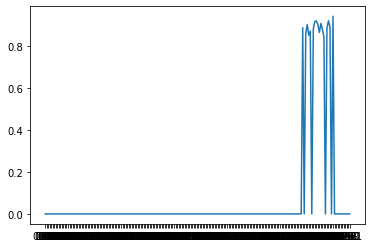

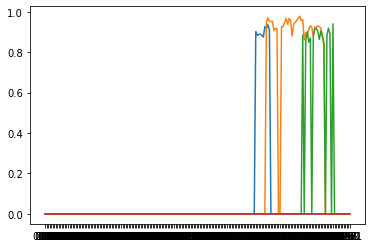

The Preselection would detect landings in following frames:  ['1_0157']
By manually labeling following frame is the landing:  ['Cam1_0158']
Results of the landing frame selection


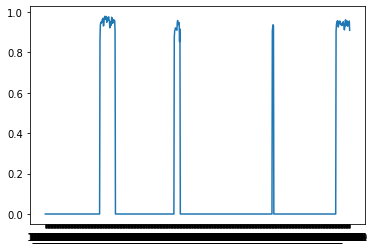

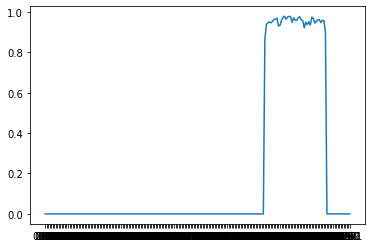

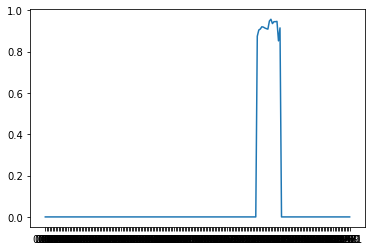

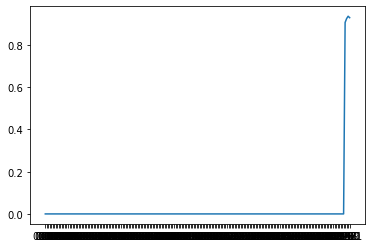

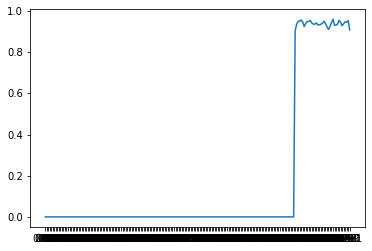

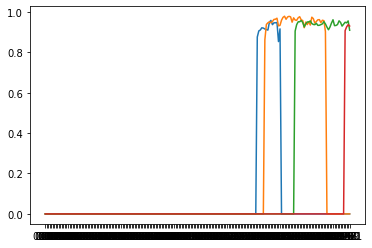

The Preselection would detect the landing in following frame:  1_0158
By manually labeling following frame is the landing:  ['Cam1_0158']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/30, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/30, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

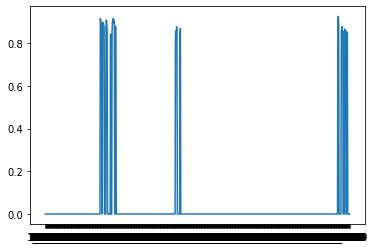

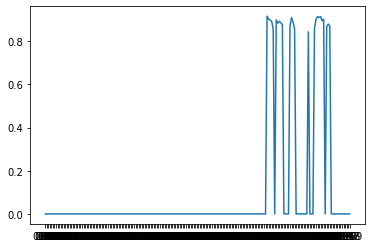

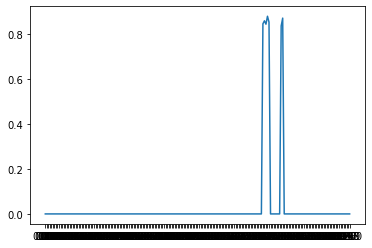

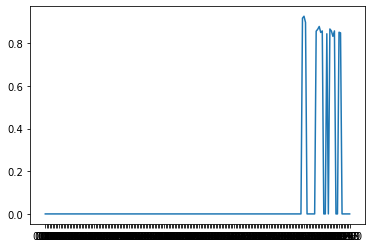

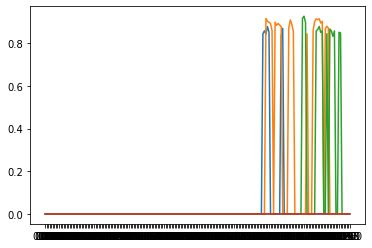

The Preselection would detect the landing in following frame:  4_0170
By manually labeling following frame is the landing:  ['Cam1_0157']
Results of the landing/flight selection


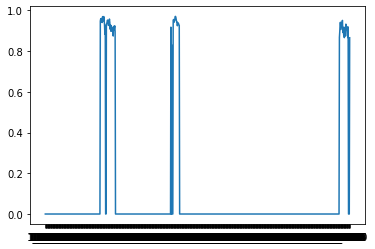

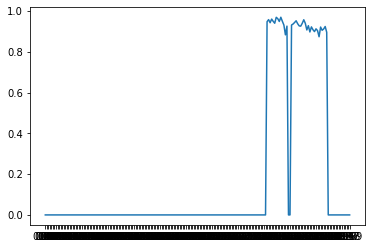

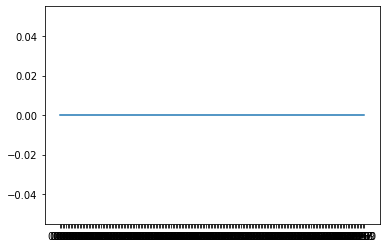

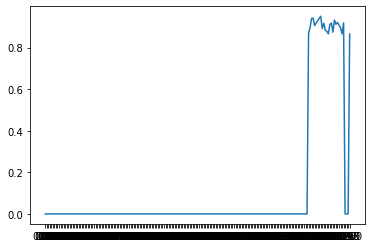

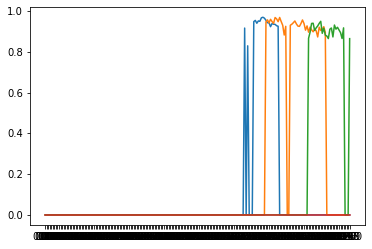

The Preselection would detect landings in following frames:  ['1_0157']
By manually labeling following frame is the landing:  ['Cam1_0157']
Results of the landing frame selection


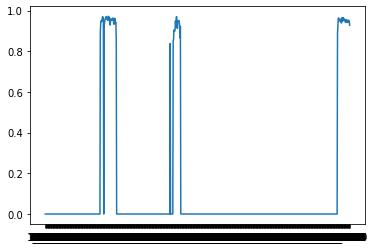

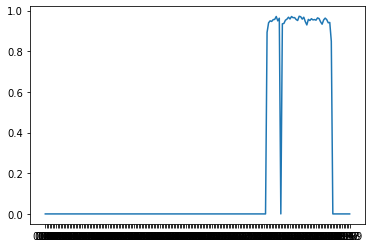

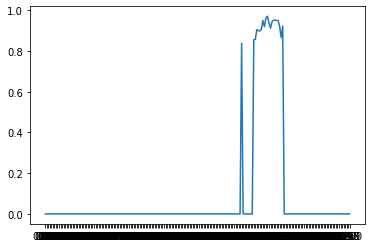

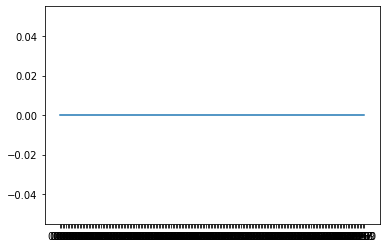

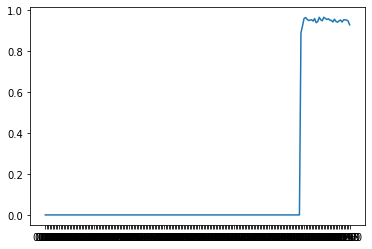

The Preselection would detect the landing in following frame:  1_0166
By manually labeling following frame is the landing:  ['Cam1_0157']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/31, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/31, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

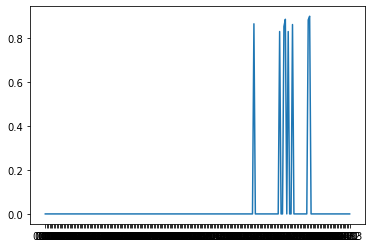

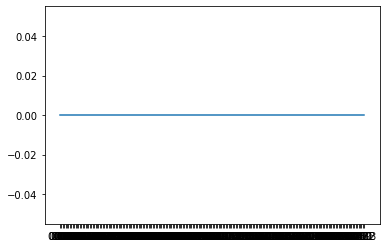

The Preselection would detect the landing in following frame:  1_0185
By manually labeling following frame is the landing:  ['Cam1_0173', 'Cam4_0173']
Results of the landing/flight selection


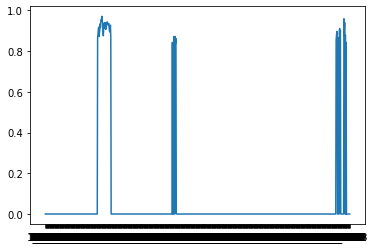

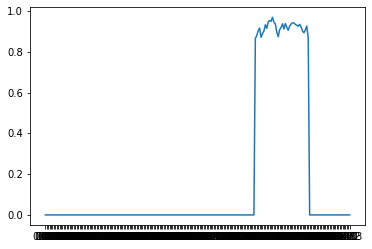

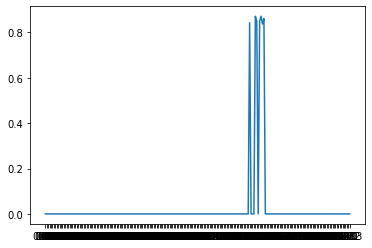

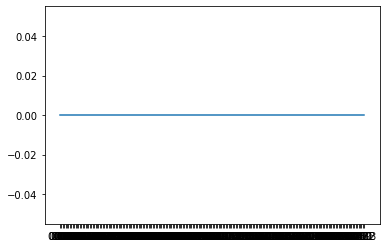

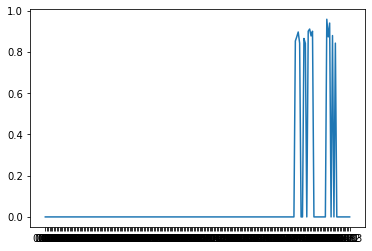

The Preselection would detect landings in following frames:  ['1_0173', '4_0181']
By manually labeling following frame is the landing:  ['Cam1_0173', 'Cam4_0173']
Results of the landing frame selection


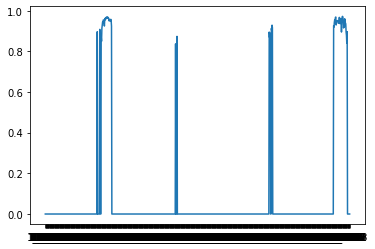

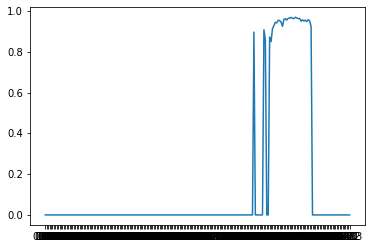

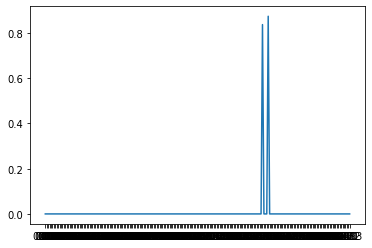

The Preselection would detect the landing in following frame:  4_0193
By manually labeling following frame is the landing:  ['Cam1_0173', 'Cam4_0173']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/32, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/32, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0

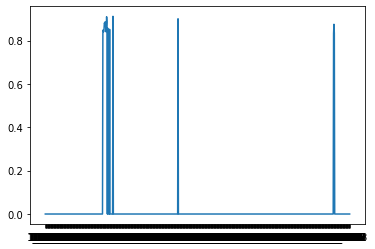

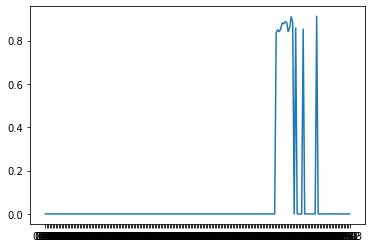

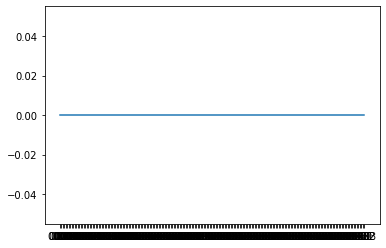

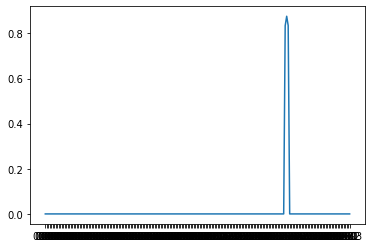

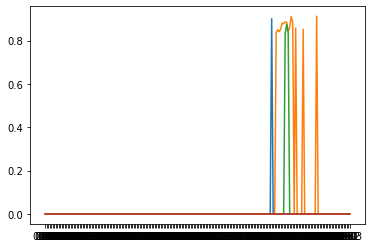

The Preselection would detect the landing in following frame:  1_0181
By manually labeling following frame is the landing:  ['Cam1_0166', 'Cam4_0166']
Results of the landing/flight selection


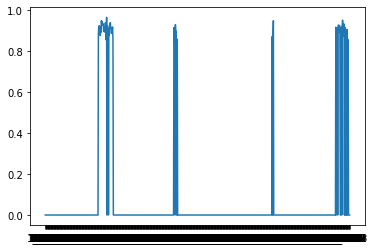

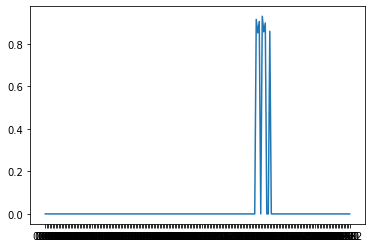

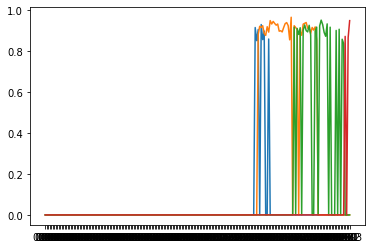

The Preselection would detect landings in following frames:  ['1_0163', '4_0168']
By manually labeling following frame is the landing:  ['Cam1_0166', 'Cam4_0166']
Results of the landing frame selection


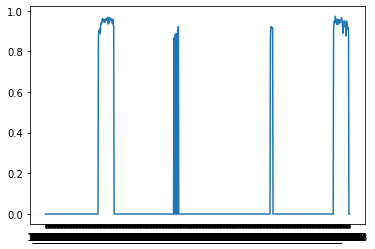

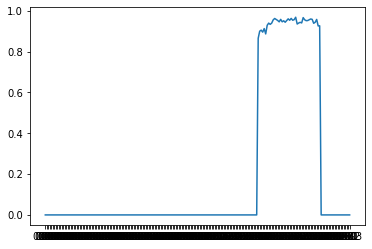

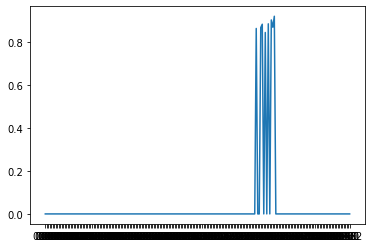

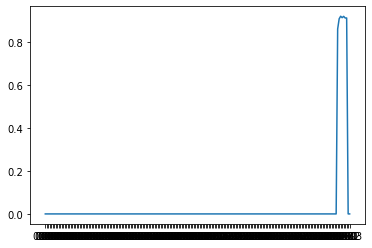

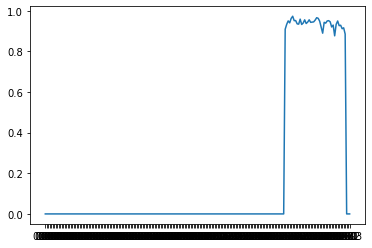

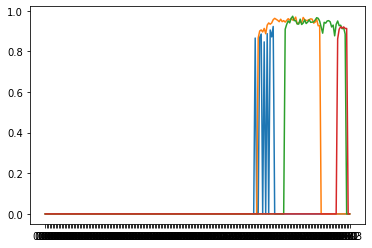

The Preselection would detect the landing in following frame:  4_0165
By manually labeling following frame is the landing:  ['Cam1_0166', 'Cam4_0166']
Path exists
Path was not existing
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/33, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/33, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 par

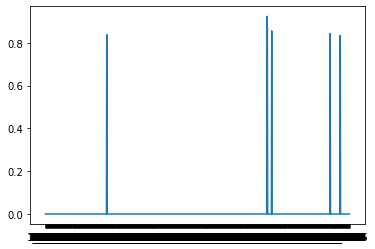

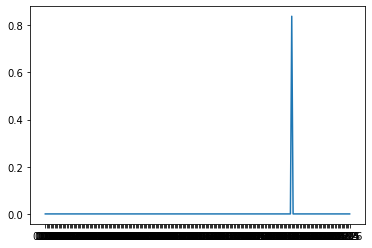

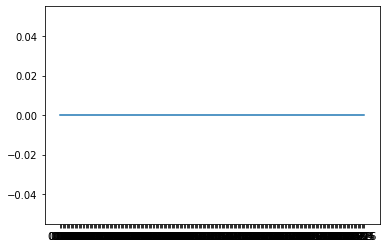

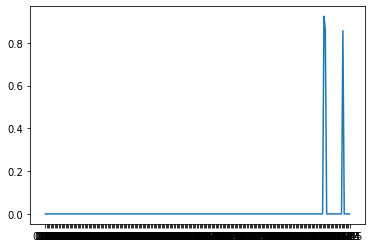

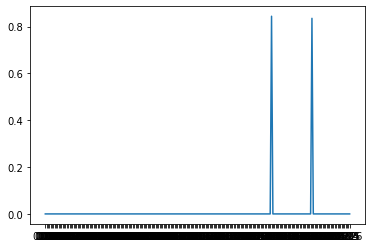

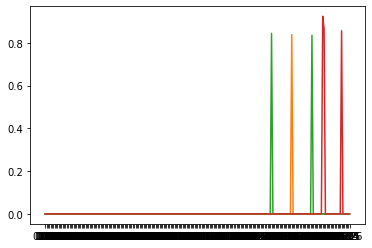

The Preselection would detect the landing in following frame:  3_0206
By manually labeling following frame is the landing:  ['Cam4_0196']
Results of the landing/flight selection


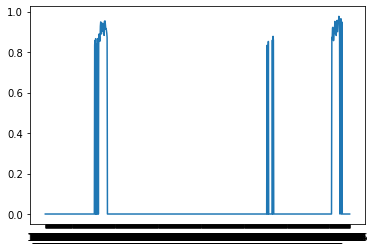

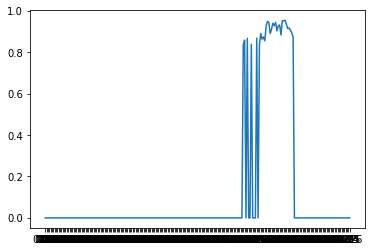

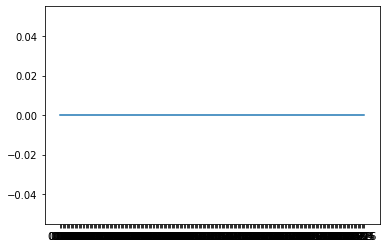

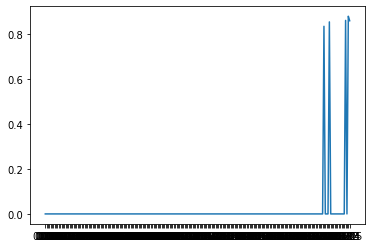

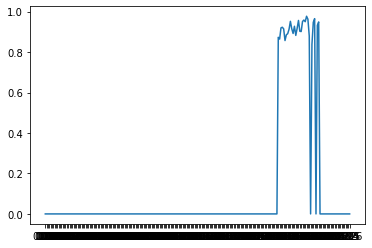

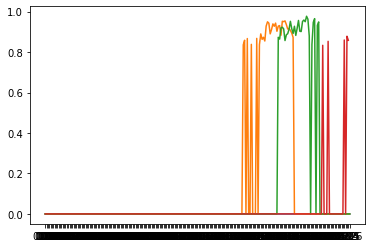

The Preselection would detect landings in following frames:  ['4_0196']
By manually labeling following frame is the landing:  ['Cam4_0196']
Results of the landing frame selection


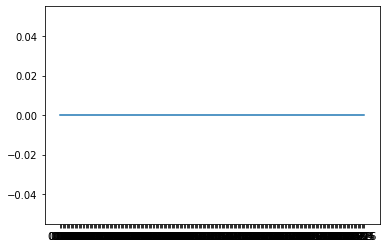

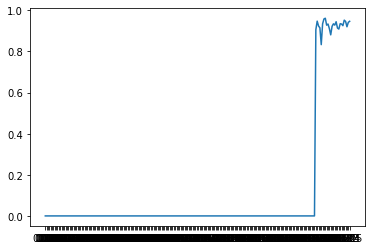

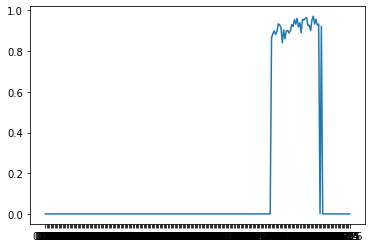

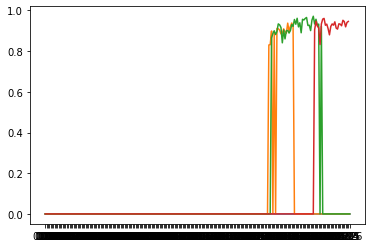

The Preselection would detect the landing in following frame:  4_0199
By manually labeling following frame is the landing:  ['Cam4_0196']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/34, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/34, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

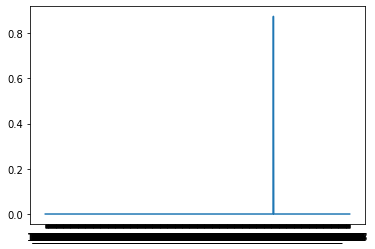

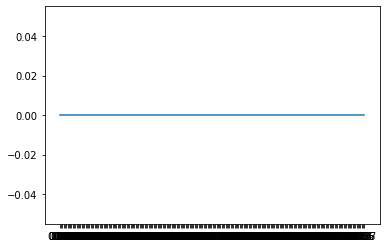

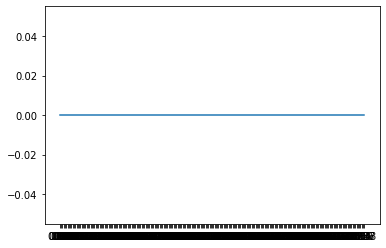

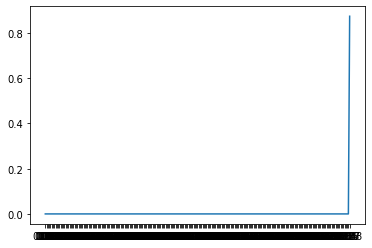

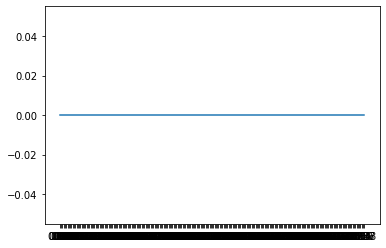

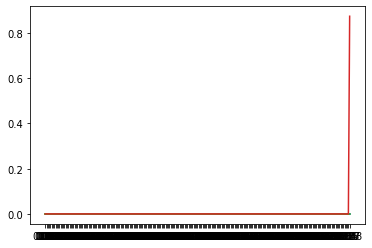

The Preselection would detect the landing in following frame:  3_0238
By manually labeling following frame is the landing:  ['Cam3_0198', 'Cam4_0198']
Results of the landing/flight selection


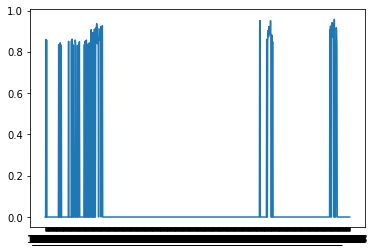

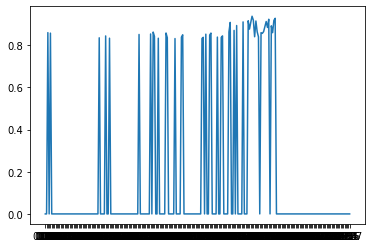

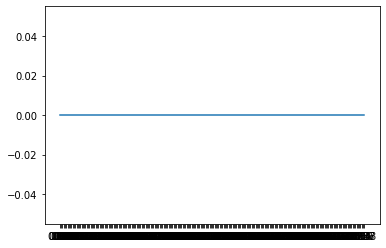

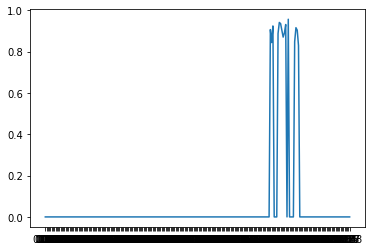

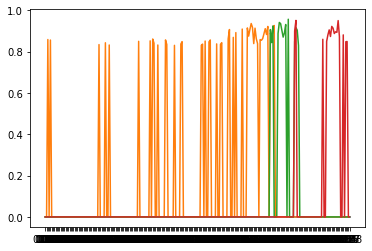

The Preselection would detect landings in following frames:  ['3_0217']
By manually labeling following frame is the landing:  ['Cam3_0198', 'Cam4_0198']
Results of the landing frame selection


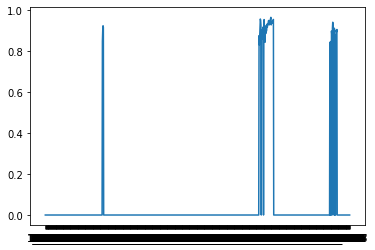

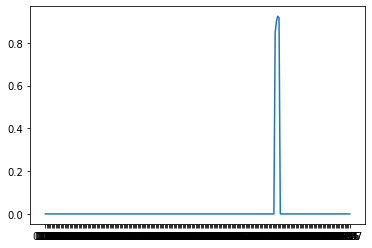

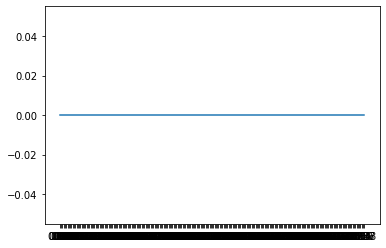

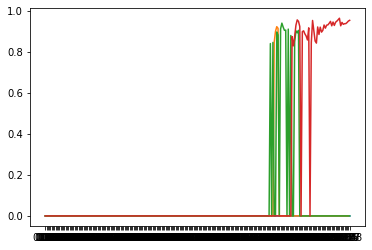

The Preselection would detect the landing in following frame:  3_0230
By manually labeling following frame is the landing:  ['Cam3_0198', 'Cam4_0198']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/35, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/35, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0

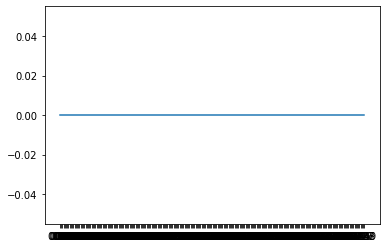

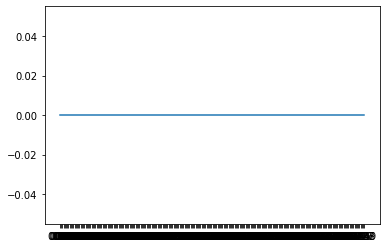

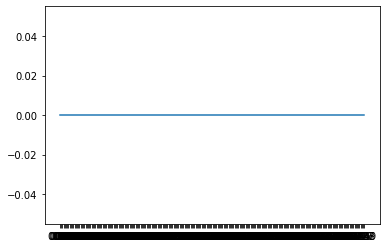

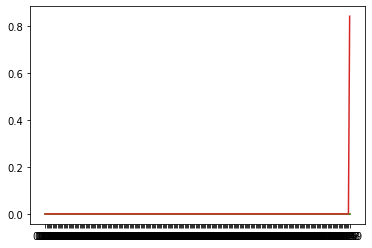

The Preselection would detect the landing in following frame:  3_0249
By manually labeling following frame is the landing:  ['Cam3_0219']
Results of the landing/flight selection


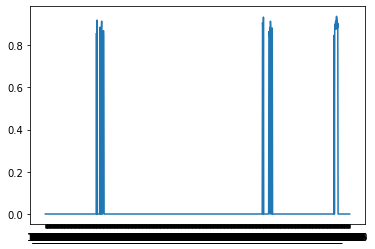

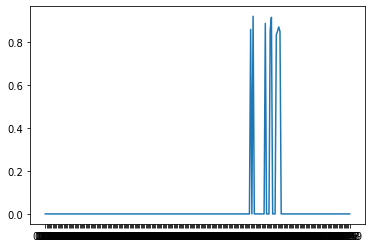

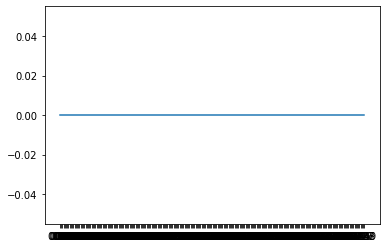

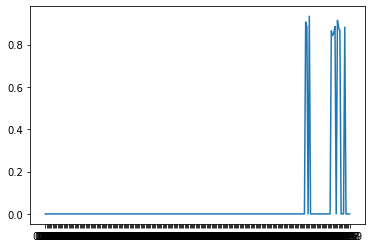

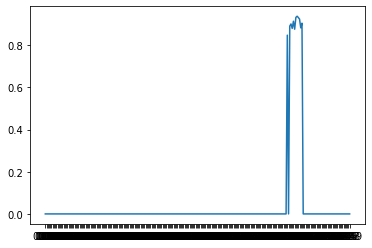

The Preselection would detect landings in following frames:  ['3_0234']
By manually labeling following frame is the landing:  ['Cam3_0219']
Results of the landing frame selection


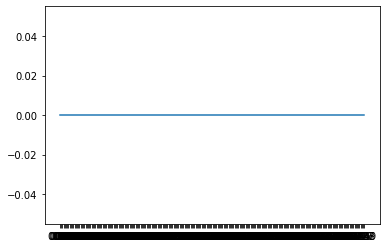

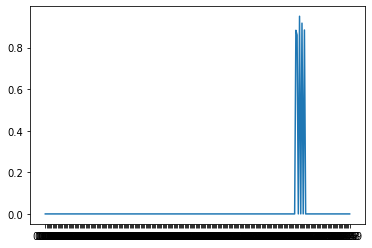

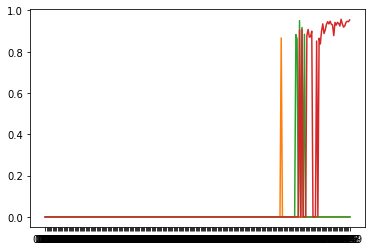

The Preselection would detect the landing in following frame:  3_0242
By manually labeling following frame is the landing:  ['Cam3_0219']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/36, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/36, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

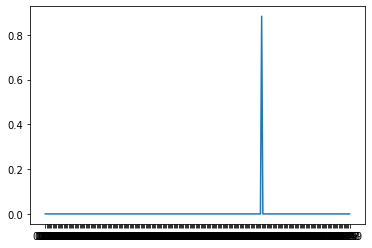

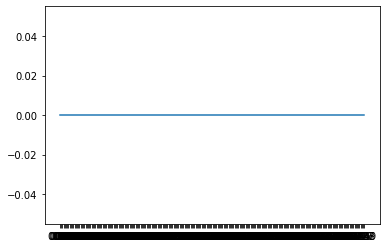

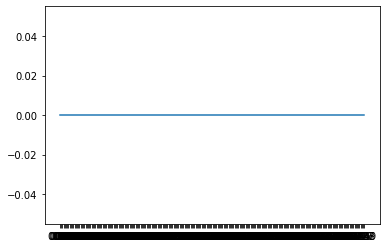

The Preselection would detect the landing in following frame:  3_0236
By manually labeling following frame is the landing:  ['Cam3_0215']
Results of the landing/flight selection


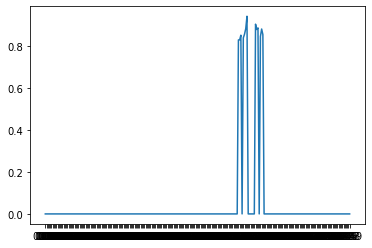

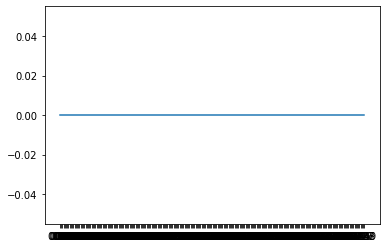

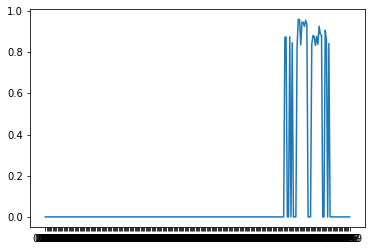

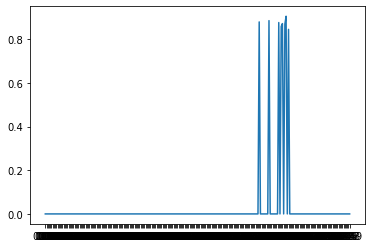

The Preselection would detect landings in following frames:  ['3_0218', '3_0226']
By manually labeling following frame is the landing:  ['Cam3_0215']
Results of the landing frame selection


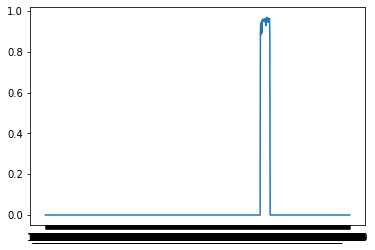

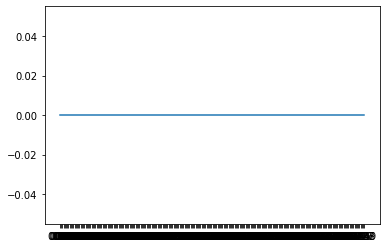

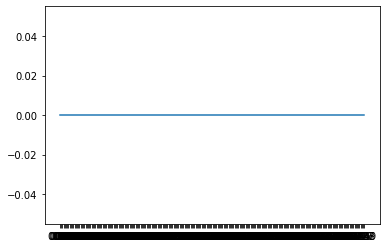

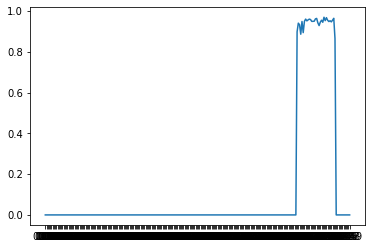

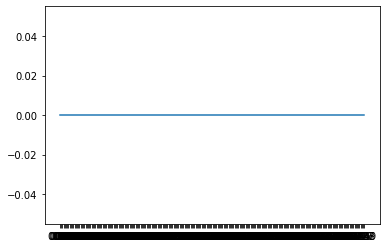

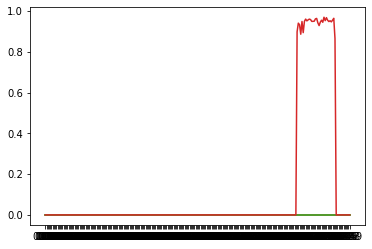

The Preselection would detect the landing in following frame:  3_0228
By manually labeling following frame is the landing:  ['Cam3_0215']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/42, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/42, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

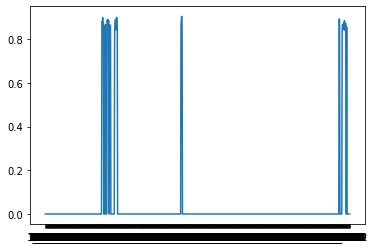

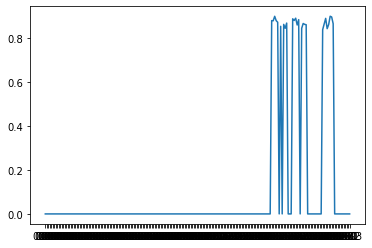

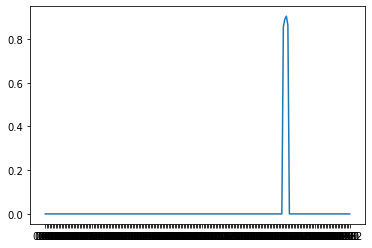

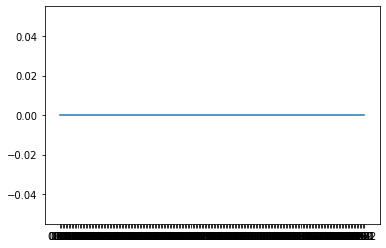

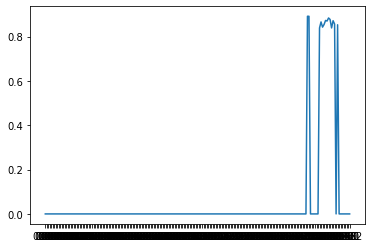

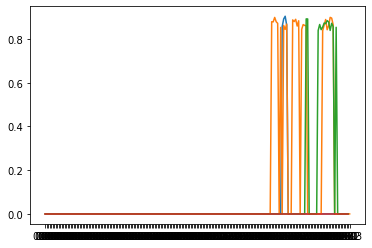

The Preselection would detect the landing in following frame:  2_0160
By manually labeling following frame is the landing:  ['Cam1_0170']
Results of the landing/flight selection


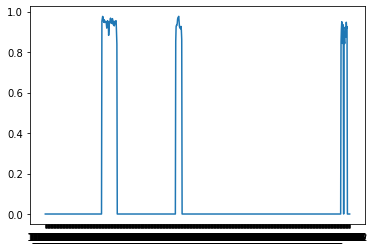

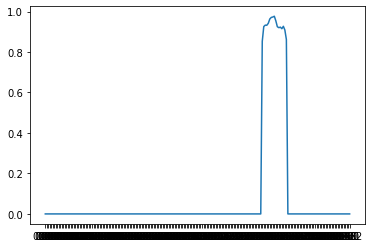

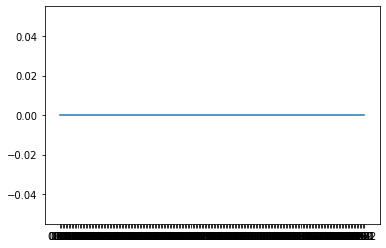

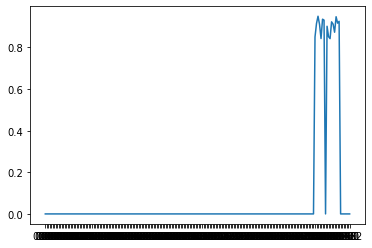

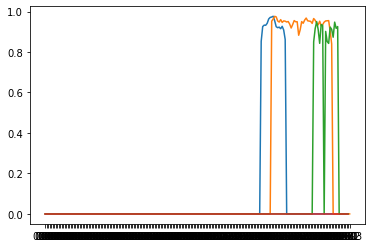

The Preselection would detect landings in following frames:  ['1_0169', '4_0184']
By manually labeling following frame is the landing:  ['Cam1_0170']
Results of the landing frame selection


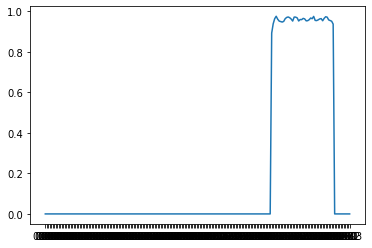

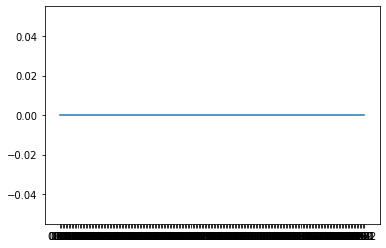

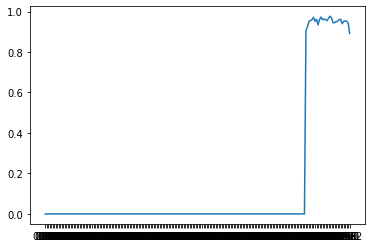

The Preselection would detect the landing in following frame:  4_0189
By manually labeling following frame is the landing:  ['Cam1_0170']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/43, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/43, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

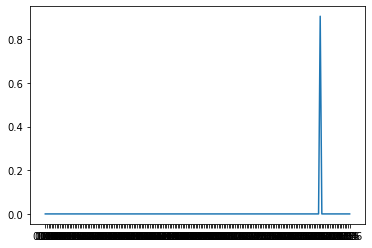

The Preselection would detect the landing in following frame:  4_0168
By manually labeling following frame is the landing:  ['Cam1_0151', 'Cam2_0151']
Results of the landing/flight selection


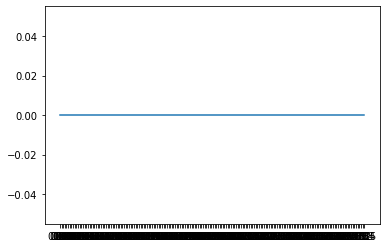

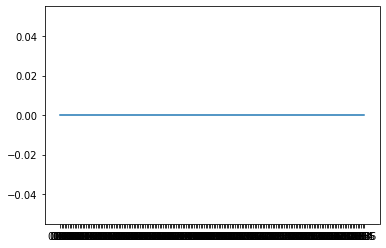

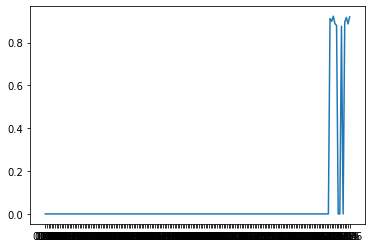

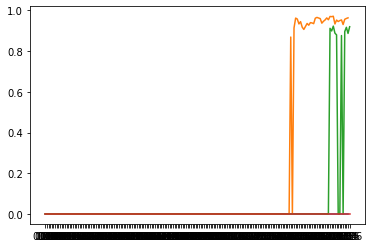

The Preselection would detect landings in following frames:  ['1_0152']
By manually labeling following frame is the landing:  ['Cam1_0151', 'Cam2_0151']
Results of the landing frame selection


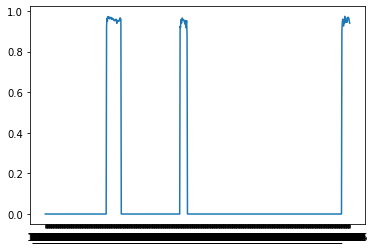

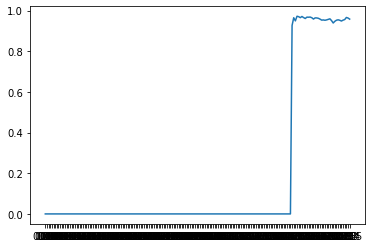

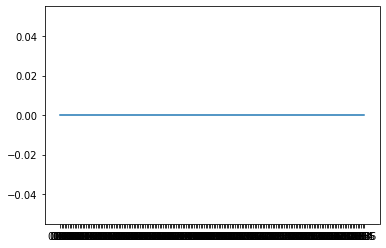

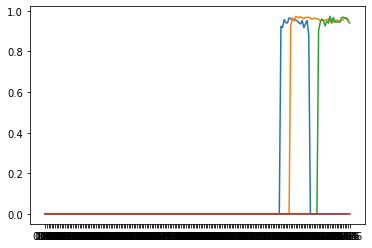

The Preselection would detect the landing in following frame:  4_0174
By manually labeling following frame is the landing:  ['Cam1_0151', 'Cam2_0151']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/44, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/44, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0

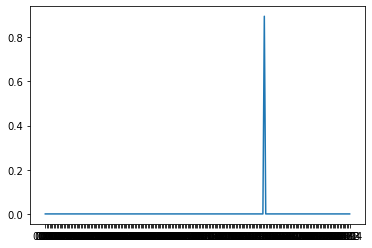

The Preselection would detect the landing in following frame:  1_0182
By manually labeling following frame is the landing:  ['Cam1_0179', 'Cam4_178']
Results of the landing/flight selection


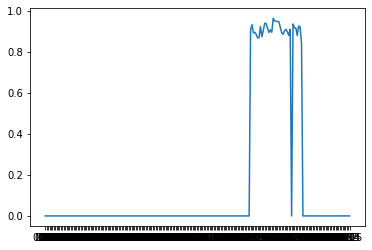

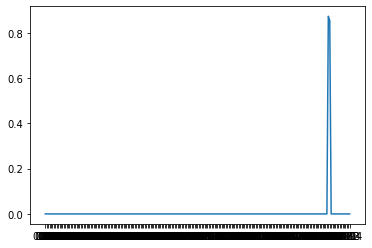

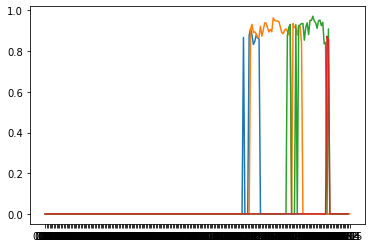

The Preselection would detect landings in following frames:  ['1_0178', '4_0177']
By manually labeling following frame is the landing:  ['Cam1_0179', 'Cam4_178']
Results of the landing frame selection


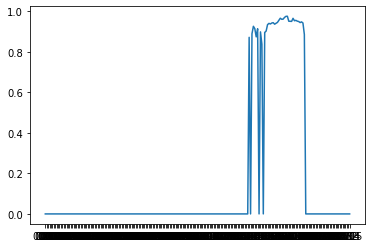

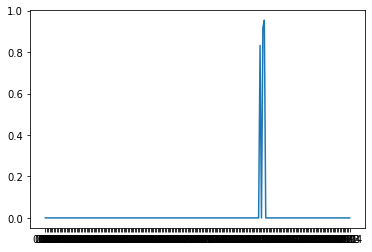

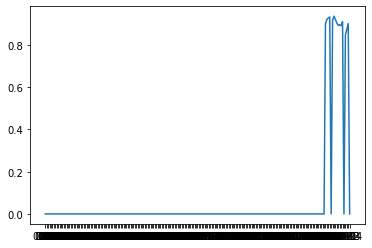

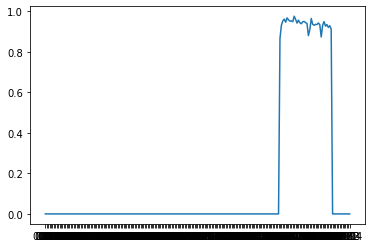

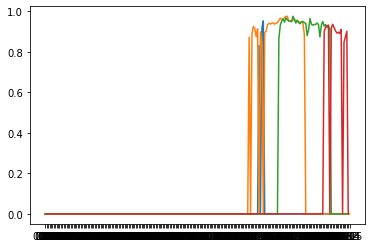

The Preselection would detect the landing in following frame:  4_0175
By manually labeling following frame is the landing:  ['Cam1_0179', 'Cam4_178']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/45, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/45, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 

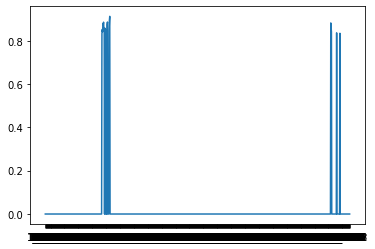

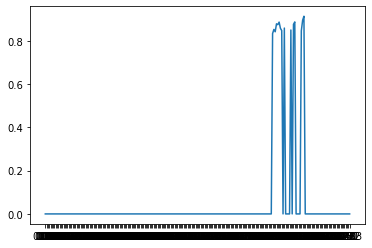

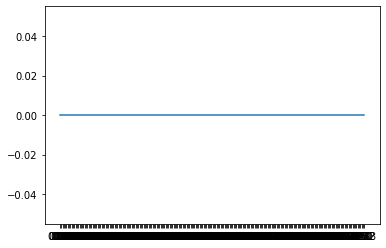

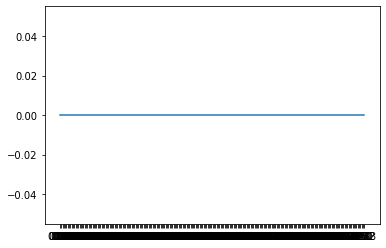

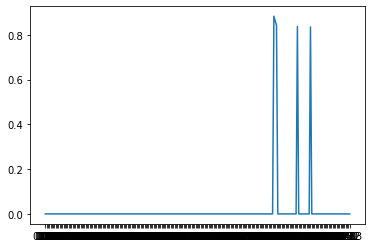

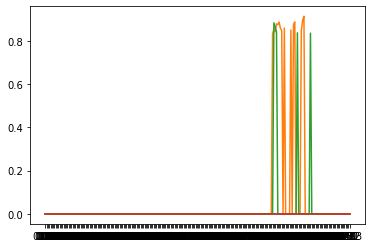

The Preselection would detect the landing in following frame:  1_0198
By manually labeling following frame is the landing:  ['Cam1_0196', 'Cam4_0196']
Results of the landing/flight selection


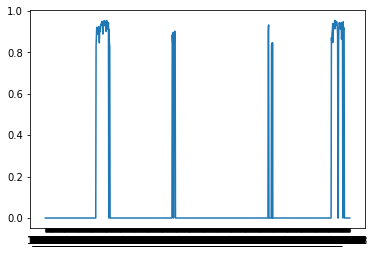

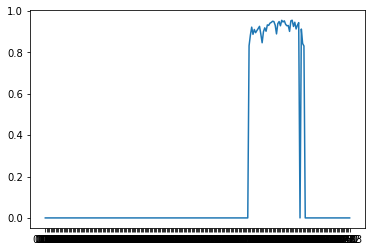

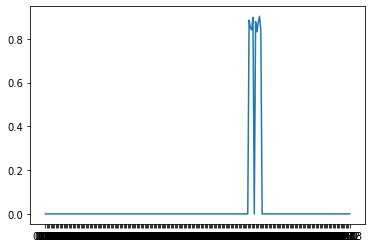

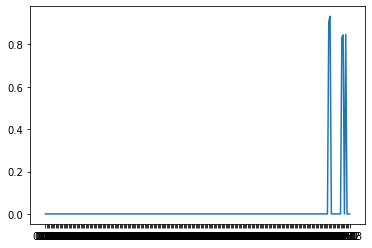

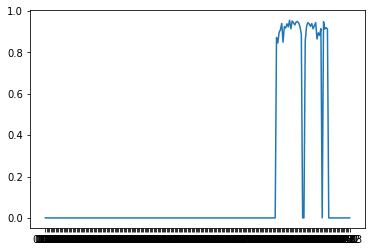

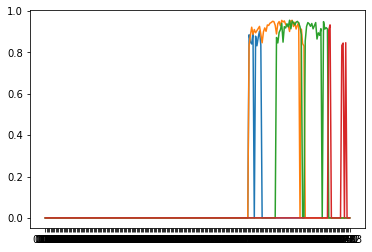

The Preselection would detect landings in following frames:  ['1_0196', '4_0199']
By manually labeling following frame is the landing:  ['Cam1_0196', 'Cam4_0196']
Results of the landing frame selection


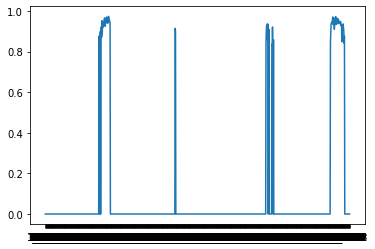

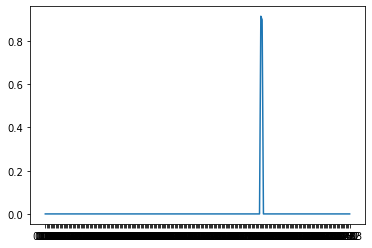

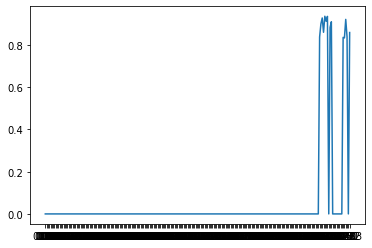

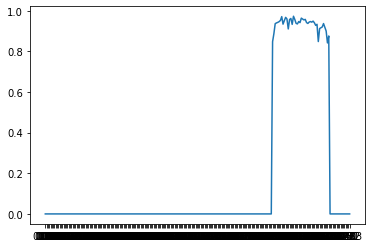

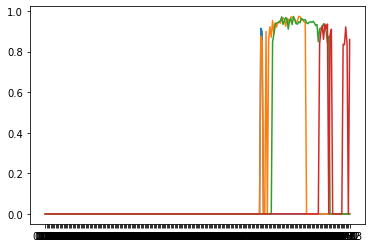

The Preselection would detect the landing in following frame:  1_0194
By manually labeling following frame is the landing:  ['Cam1_0196', 'Cam4_0196']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/46, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/46, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0

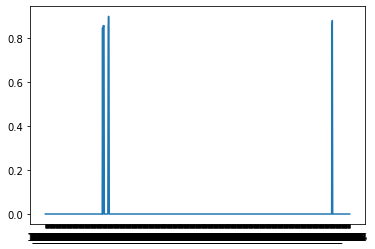

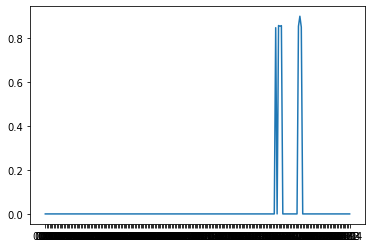

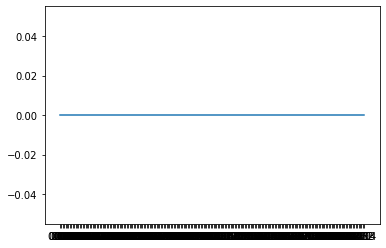

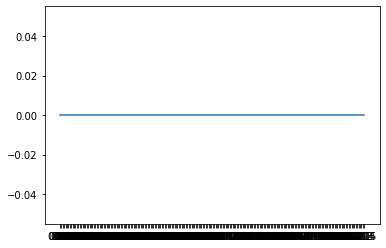

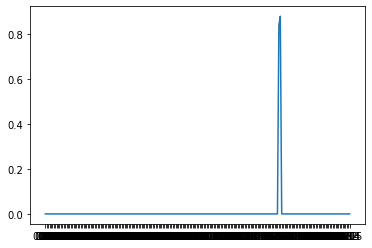

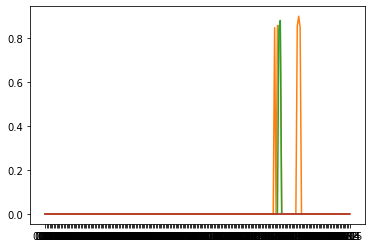

The Preselection would detect the landing in following frame:  1_0179
By manually labeling following frame is the landing:  ['Cam4_0183']
Results of the landing/flight selection


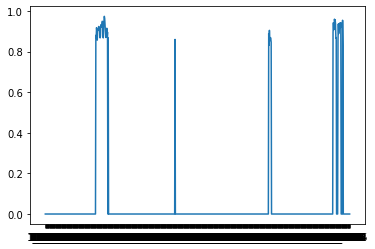

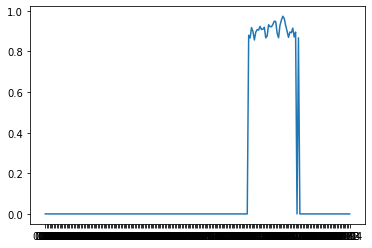

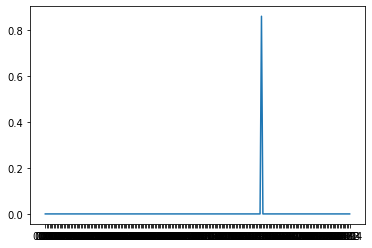

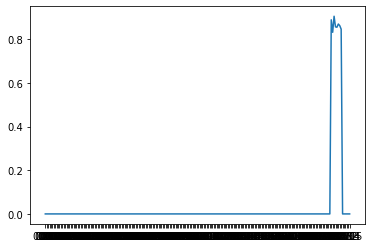

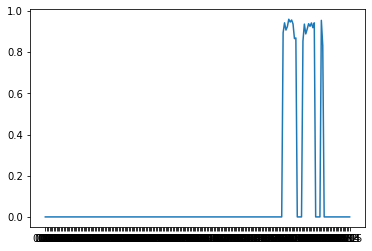

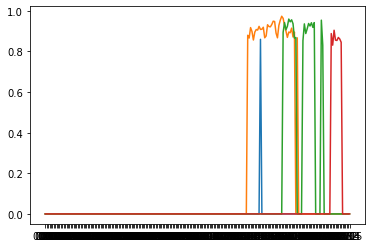

The Preselection would detect landings in following frames:  ['4_0177']
By manually labeling following frame is the landing:  ['Cam4_0183']
Results of the landing frame selection


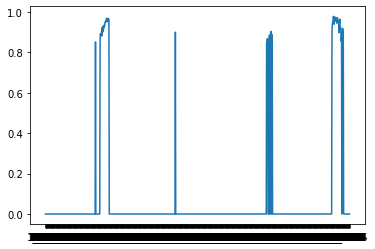

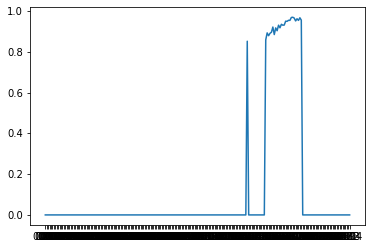

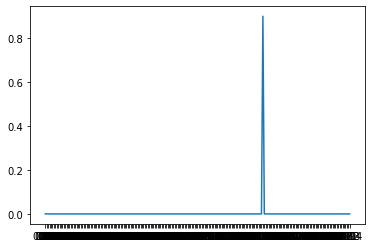

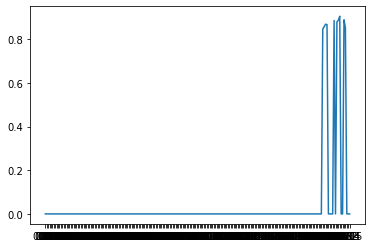

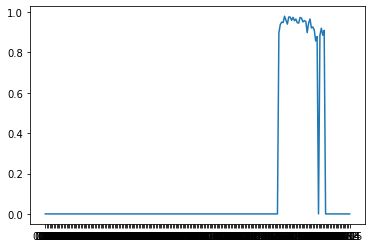

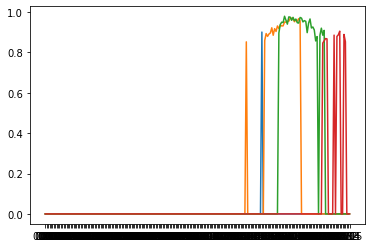

The Preselection would detect the landing in following frame:  4_0169
By manually labeling following frame is the landing:  ['Cam4_0183']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/47, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/47, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 1

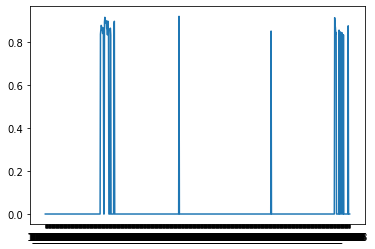

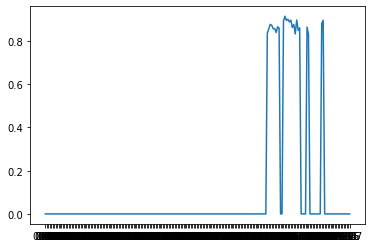

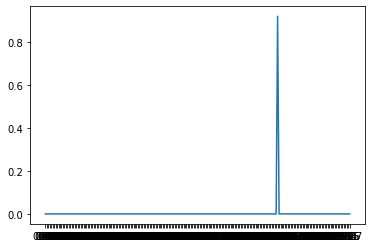

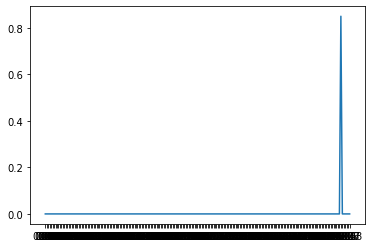

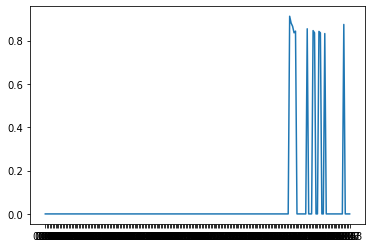

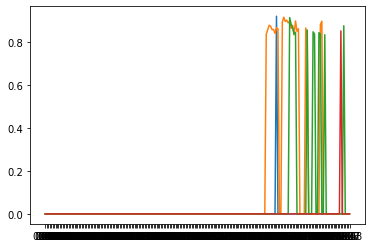

The Preselection would detect the landing in following frame:  2_0158
By manually labeling following frame is the landing:  ['Cam1_0169', 'Cam4_0169']
Results of the landing/flight selection


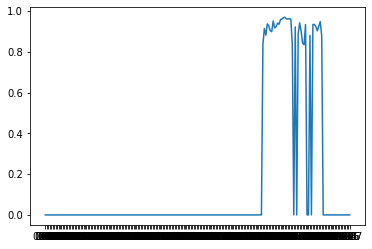

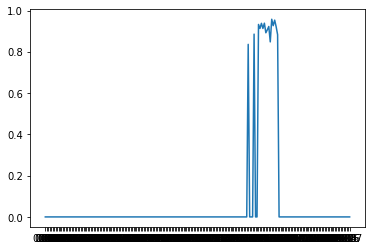

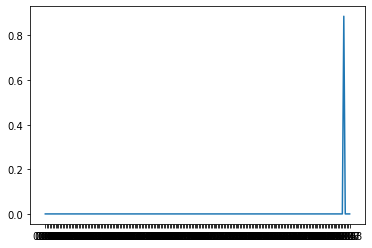

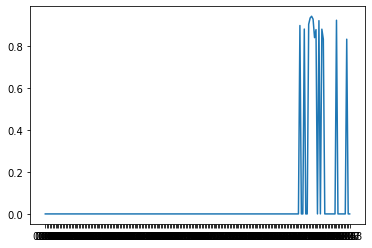

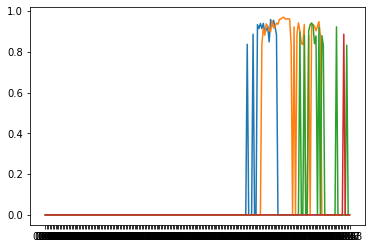

The Preselection would detect landings in following frames:  ['1_0170', '1_0177', '4_0190']
By manually labeling following frame is the landing:  ['Cam1_0169', 'Cam4_0169']
Results of the landing frame selection


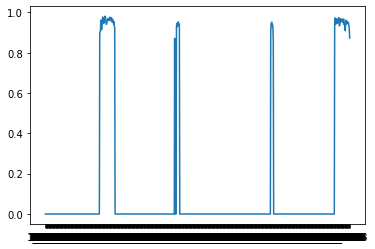

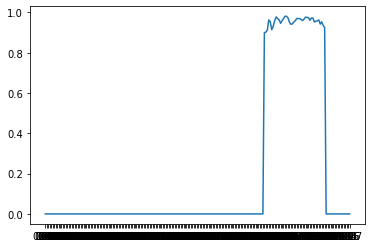

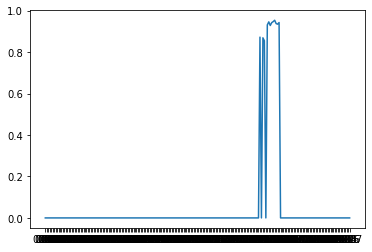

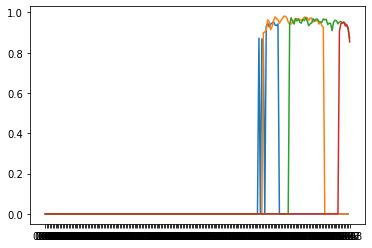

The Preselection would detect the landing in following frame:  1_0164
By manually labeling following frame is the landing:  ['Cam1_0169', 'Cam4_0169']
Path exists
Path exists
Path exists
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/48, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.83, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/48, name=confthres0.83, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0

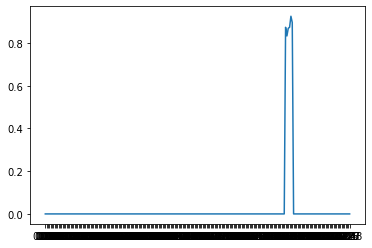

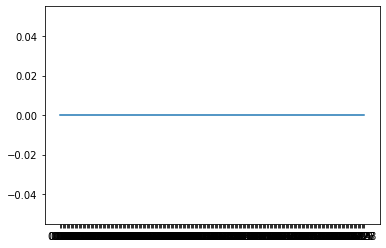

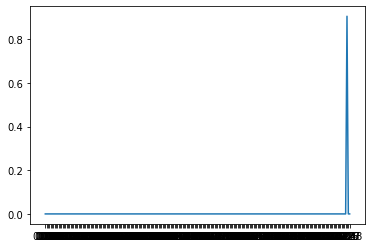

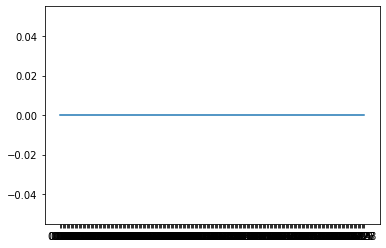

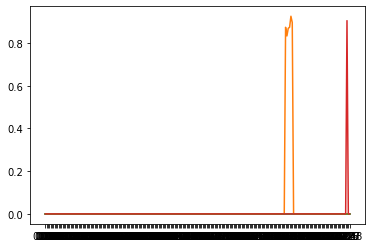

The Preselection would detect the landing in following frame:  1_0184
By manually labeling following frame is the landing:  ['Cam3_0193', 'Cam4_0193']
Results of the landing/flight selection


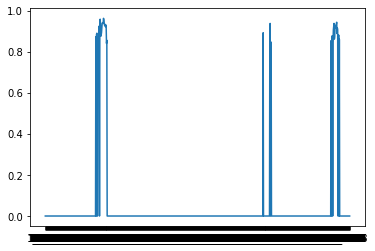

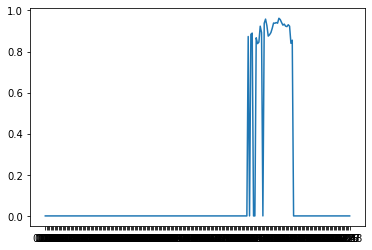

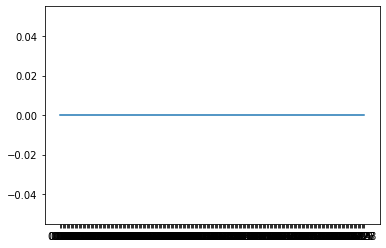

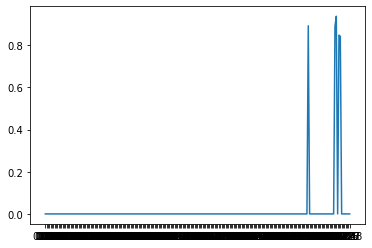

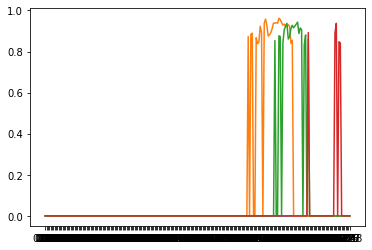

The Preselection would detect landings in following frames:  ['4_0194']
By manually labeling following frame is the landing:  ['Cam3_0193', 'Cam4_0193']
Results of the landing frame selection


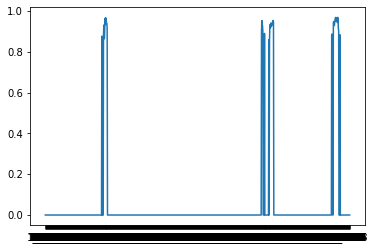

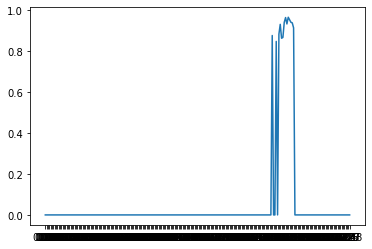

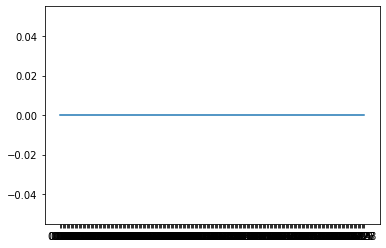

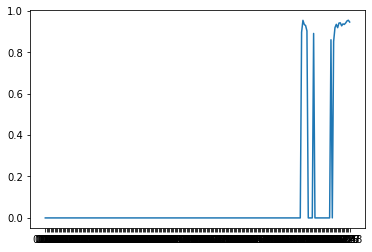

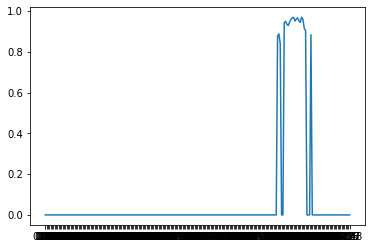

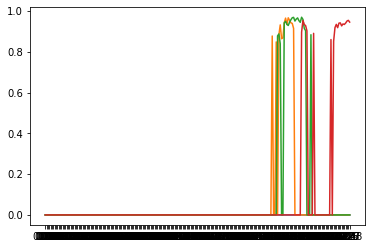

The Preselection would detect the landing in following frame:  4_0192
By manually labeling following frame is the landing:  ['Cam3_0193', 'Cam4_0193']


In [ ]:
#all in one Detection Yolo 

import os
import json
import numpy as np
import matplotlib.pyplot as plt


for xx in td:
    

    landing_pic = "/content.gdrive/MyDrive/Vorselektion/Ramsau_Samples/" + xx

    Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
    if os.path.isdir(Path_Result_1):
      print("Path exists")
    else:
      os.mkdir(Path_Result_1)
      print("Path was not existing")

    Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
    if os.path.isdir(Path_Result_2):
      print("Path exists")
    else:
      os.mkdir(Path_Result_2)
      print("Path was not existing")


    Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
    if os.path.isdir(Path_Result_3):
      print("Path exists")
    else:
      os.mkdir(Path_Result_3)
      print("Path was not existing")


    x = 0.83

    name = 'confthres' + str(x)

    %cd /content/yolov5
    #Skijumper only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

    #Landing Frame only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

    #Landing and Flight
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}



    for x in ['1', '2', '3']:
        if x == '1':
          Path = Path_Result_1
          print("Results of the landing sequence selection")
        elif x == '2':
          Path = Path_Result_2
          print("Results of the landing/flight selection")
        elif x == '3':
          Path = Path_Result_3
          print("Results of the landing frame selection")

        with open(Path + '/' + name + '/list.json', "r") as fp:
            data = json.load(fp)
          
        conf = np.array(data["conf"])
        index = np.array(data["index"])
        cls = np.array(data["cls"])
        x_center = np.array(data["x"])
        y_center = np.array(data["y"])
        

        with open(Path[:-2] + "results.json", "r") as fp:
            resultdata = json.load(fp)


        resultdata["Ordner"].append(xx)
        resultdata["SOLL"].append(Labels[xx])


        X = index
        Y = conf

        plt.plot(X, Y)
        plt.show()

        index1 = []
        conf1 = []
        cls1 = []
        index2 = []
        conf2 = []
        cls2 = []
        index3 = []
        conf3 = []
        cls3 = []
        index4 = []
        conf4 = []
        cls4 = []

        for i, x in enumerate(index):
            if x[0] == '1':
              conf2.append(conf[i])
              index2.append(x[2:])
              cls2.append(cls[i])
            elif x[0] == '2':
              conf1.append(conf[i])
              index1.append(x[2:])
              cls1.append(cls[i])
            elif x[0] == '3':
              conf4.append(conf[i])
              index4.append(x[2:])
              cls4.append(cls[i])
            elif x[0] == '4':
              conf3.append(conf[i])
              index3.append(x[2:])
              cls3.append(cls[i])



        plt.plot(index2, conf2)
        plt.show()
        plt.plot(index1, conf1)
        plt.show()
        plt.plot(index4, conf4)
        plt.show()
        plt.plot(index3, conf3)
        plt.show()

        plt.plot(index1, conf1)
        plt.plot(index2, conf2)
        plt.plot(index3, conf3)
        plt.plot(index4, conf4)
        plt.show()


        if 1 in cls:
        
            detections = []
            lastcls = 9
            for i, c in enumerate(cls1):
                if c == 1:
                    lastcls = 1
                if c == 0 and lastcls == 1:
                    detections.append("2_" + index1[i])
                    lastcls = 9

            lastcls = 9
            for i, c in enumerate(cls2):
                if c == 1:
                    lastcls = 1
                if c == 0 and lastcls == 1:
                    detections.append("1_" + index2[i])
                    lastcls = 9

            lastcls = 9
            for i, c in enumerate(cls3):
                if c == 1:
                    lastcls = 1
                if c == 0 and lastcls == 1:
                    detections.append("4_" + index3[i])
                    lastcls = 9

            lastcls = 9
            for i, c in enumerate(cls4):
                if c == 1:
                    lastcls = 1
                if c == 0 and lastcls == 1:
                    detections.append("3_" + index4[i])
                    lastcls = 9


            print("The Preselection would detect landings in following frames: ", detections)
            resultdata["Selection"].append(detections)

        else:
          
            maxindex = np.argmax(conf)
            detection = index[maxindex]  
            print("The Preselection would detect the landing in following frame: ", detection)
            resultdata["Selection"].append(detection)

        print("By manually labeling following frame is the landing: ", Labels[xx])




        with open(Path[:-2] + "results.json", "w") as fp:
            json.dump(resultdata, fp, indent=4)


In [11]:
#all in one Detection Yolo Ramsau

import os
import json
import numpy as np
import matplotlib.pyplot as plt

td = ['43']
for xx in td:


    landing_pic = "/content.gdrive/MyDrive/Vorselektion/Ramsau_Samples/" + xx

    Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
    if os.path.isdir(Path_Result_1):
      print("Path exists")
    else:
      os.mkdir(Path_Result_1)
      print("Path was not existing")

    Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
    if os.path.isdir(Path_Result_2):
      print("Path exists")
    else:
      os.mkdir(Path_Result_2)
      print("Path was not existing")


    Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
    if os.path.isdir(Path_Result_3):
      print("Path exists")
    else:
      os.mkdir(Path_Result_3)
      print("Path was not existing")


    x = 0.832

    name = 'confthres' + str(x)

    %cd /content/yolov5
    #Skijumper only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

    #Landing Frame only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

    #Landing and Flight
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}



    for x in ['1', '2', '3']:
        if x == '1':
          Path = Path_Result_1
          print("Results of the landing sequence selection")
        elif x == '2':
          Path = Path_Result_2
          print("Results of the landing/flight selection")
        elif x == '3':
          Path = Path_Result_3
          print("Results of the landing frame selection")

        with open(Path + '/' + name + '/list.json', "r") as fp:
            data = json.load(fp)
          
        conf = np.array(data["conf"])
        index = np.array(data["index"])
        cls = np.array(data["cls"])
        x_center = np.array(data["x"])
        y_center = np.array(data["y"])
        
        if int(xx) < 10: 
          with open(Path[:-1] + "results.json", "r") as fp:
            resultdata = json.load(fp)
        else:
          with open(Path[:-2] + "results.json", "r") as fp:
            resultdata = json.load(fp)


        resultdata["Ordner"].append(xx)
        resultdata["SOLL"].append(Labels[xx])


        X = index
        Y = conf

        #plt.plot(X, Y)
        #plt.show()

        index1 = []
        conf1 = []
        cls1 = []
        index2 = []
        conf2 = []
        cls2 = []
        index3 = []
        conf3 = []
        cls3 = []
        index4 = []
        conf4 = []
        cls4 = []

        for i, idx in enumerate(index):
            if idx[0] == '1':
              conf1.append(conf[i])
              index1.append(idx[2:])
              cls1.append(cls[i])
            elif idx[0] == '2':
              conf2.append(conf[i])
              index2.append(idx[2:])
              cls2.append(cls[i])
            elif idx[0] == '3':
              conf3.append(conf[i])
              index3.append(idx[2:])
              cls3.append(cls[i])
            elif idx[0] == '4':
              conf4.append(conf[i])
              index4.append(idx[2:])
              cls4.append(cls[i])


        """
        plt.plot(index1, conf1)
        plt.show()
        plt.plot(index2, conf2)
        plt.show()
        plt.plot(index3, conf3)
        plt.show()
        plt.plot(index4, conf4)
        plt.show()

        plt.plot(index1, conf1)
        plt.plot(index2, conf2)
        plt.plot(index3, conf3)
        plt.plot(index4, conf4)
        plt.show()
        """

        if x == '1' or x == '3':
            detections = []
            cams = [conf1, conf2, conf3, conf4]
            indexes = [index1, index2, index3, index4]
            for idx, cam in enumerate(cams):
              for i, c in enumerate(cam):
                if c > 0:
                  detections.append(str(idx+1)+ "_" + indexes[idx][i])

            maxindex = np.argmax(conf)
            detection = index[maxindex]
            det = []
            det.append(detection)  
            print("The Preselection would detect the landing in following frame: ", detection)
            print("Summe der Detections", len(detections))
            resultdata["Selection"].append(det)

            cam1 = []
            cam2 = []
            cam3 = []
            cam4 = []
            for det in detections:
                if det[0] == '1':
                  cam1.append(det)
                elif det[0] == '2':
                  cam2.append(det)
                elif det[0] == '3':
                  cam3.append(det)
                elif det[0] == '4':
                  cam4.append(det)
            if len(cam1) != 0:
              print("In Cam 1 von ", cam1[0], "bis ", cam1[-1])
            if len(cam2) != 0:
              print("In Cam 2 von ", cam2[0], "bis ", cam2[-1])
            if len(cam3) != 0:
              print("In Cam 3 von ", cam3[0], "bis ", cam3[-1])
            if len(cam4) != 0:
              print("In Cam 4 von ", cam4[0], "bis ", cam4[-1])

        elif x == '2':
            
            cams = [cls1, cls2, cls3, cls4]
            indexes = [index1, index2, index3, index4]
            detections = []
            for idx, cam in enumerate(cams):
              lastcls = 9
              for i, c in enumerate(cam):
                  if c == 1:
                      lastcls = 1
                  if c == 0 and lastcls == 1:
                      detections.append(str(idx+1)+ "_" + indexes[idx][i])
                      lastcls = 9
                      break
              if len(detections) > 0:
                  break

            resultdata["Selection"].append(detections)
            print("The Preselection would detect landings in following frames: ", detections)

        print("By manually labeling following frame is the landing: ", Labels[xx])



        if int(xx) < 10: 
          with open(Path[:-1] + "results.json", "r") as fp:
            resultdata = json.load(fp)
        else:
          with open(Path[:-2] + "results.json", "w") as fp:
            json.dump(resultdata, fp, indent=4)
    
    

Path exists
Path exists
Path exists
/content/yolov5
Results of the landing sequence selection
The Preselection would detect the landing in following frame:  3_0156
Summe der Detections 72
In Cam 3 von  3_0126 bis  3_0156
In Cam 4 von  4_0130 bis  4_0180
By manually labeling following frame is the landing:  ['3_143']
Results of the landing/flight selection
The Preselection would detect landings in following frames:  ['3_0143']
By manually labeling following frame is the landing:  ['3_143']
Results of the landing frame selection
The Preselection would detect the landing in following frame:  3_0144
Summe der Detections 116
In Cam 1 von  1_0088 bis  1_0088
In Cam 2 von  2_0093 bis  2_0124
In Cam 3 von  3_0106 bis  3_0157
In Cam 4 von  4_0130 bis  4_0180
By manually labeling following frame is the landing:  ['3_143']


In [10]:
import json
import numpy as np
#with open('/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/results.json', "r") as fp:
#with open('/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/results.json', "r") as fp:
with open('/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/results.json', "r") as fp:
  data = json.load(fp)
J = np.array(data["Ordner"])
SOLL = np.array(data["SOLL"])
IST = np.array(data["Selection"])

for i, x in enumerate(SOLL):
  print(J[i], '------', SOLL[i], "-----", IST[i])
  if len(IST[i]) == 1 and len(SOLL[i]) == 1 and SOLL[i][0] == IST[i][0]:
    print("OK")
  if len(IST[i]) == 1 and len(SOLL[i]) == 2:
    if SOLL[i][0] == IST[i][0] or SOLL[i][1] == IST[i][0]:
      print("OK")
  if len(IST[i]) == 2 and len(SOLL[i]) == 1:
    if SOLL[i][0] == IST[i][0] or SOLL[i][0] == IST[i][1]:
      print("OK")
  if len(IST[i]) == 2 and len(SOLL[i]) == 2:
    if SOLL[i][0] == IST[i][0] or SOLL[i][0] == IST[i][1] or SOLL[i][1] == IST[i][0] or SOLL[i][1] == IST[i][1] :
      print("OK")



29 ------ ['1_0158'] ----- ['1_0157']
30 ------ ['1_0157'] ----- ['1_0157']
OK
31 ------ ['1_0173', '4_0173'] ----- ['1_0173', '4_0181']
OK
32 ------ ['1_0166', '4_0166'] ----- ['1_0163', '4_0168']
33 ------ ['4_0196'] ----- ['4_0196']
OK
34 ------ ['3_0198', '4_0198'] ----- ['3_0217']
35 ------ ['3_0219'] ----- ['3_0234']
36 ------ ['3_0215'] ----- ['3_0218', '3_0226']
42 ------ ['1_0170'] ----- ['1_0169', '4_0184']
43 ------ ['1_0151', '2_0151'] ----- ['1_0152']
44 ------ ['1_0179', '4_178'] ----- ['1_0178', '4_0177']
45 ------ ['1_0196', '4_0196'] ----- ['1_0196', '4_0199']
OK
46 ------ ['4_0183'] ----- ['4_0177']
47 ------ ['1_0169', '4_0169'] ----- ['1_0170', '1_0177', '4_0190']
48 ------ ['3_0193', '4_0193'] ----- ['4_0194']
88 ------ ['3_0132'] ----- ['3_0132']
OK
88 ------ ['3_0132'] ----- ['3_0132']
OK
39 ------ ['2_0101'] ----- ['2_0101']
OK
41 ------ ['2_0110'] ----- ['2_0109']
40 ------ ['3_0128'] ----- ['3_0127']
90 ------ ['3_0140'] ----- ['3_0140']
OK
91 ------ ['3_0144'

<ipython-input-10-aebbf8253b8f>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SOLL = np.array(data["SOLL"])
<ipython-input-10-aebbf8253b8f>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  IST = np.array(data["Selection"])


In [28]:
import os
import glob 
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
def get_image_paths(directory):
    image_paths = []
    files = os.listdir(directory)
    for file in files:
        if os.path.splitext(file)[1].lower() in image_extensions:
            image_paths.append(os.path.join(directory, file))
    return image_paths

PATH = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results'
samples = next(os.walk(PATH))[1]
print(samples)

for s in samples:
  Pfad = PATH + '/' + s
  runs = next(os.walk(Pfad))[1]
  print(Pfad)

  for r in runs:
    p = Pfad + '/' + r
    #print(p)
    image_paths = get_image_paths(p)
    for i in image_paths:
      os.remove(i)
      #print(i)









['29', '.ipynb_checkpoints', '30', '31', '32', '33', '34', '35', '36', '42', '43', '44', '45', '46', '47', '48', '73', '1', '2', '3', '45556', '89', '88', '39', '41', '40', '90', '91', '94', '92', '64', '65', '62', '63', '85', '84', '86', '74', '75', '76', '4']
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/29
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/.ipynb_checkpoints
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/30
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/31
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/32
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/33
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/34
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/35
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/36
/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/42
/content.gdrive/MyDrive/Vorselek

In [37]:
import shutil

images_directory = "/content.gdrive/MyDrive/BilderEwoxxMCI/ÖM Ramsau 15.10.2022"
shutil.rmtree(images_directory)